In [209]:
#importing libraries
import pandas as pd #data preprocessing
import numpy as np #linear algebra
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn

In [210]:
from imblearn.over_sampling import SMOTE

In [211]:
train = pd.read_excel('case_study_data.xlsx')

In [212]:
train.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,...,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker,status
0,A11,9,A34,A43,1754,A65,A75,6,A93,A101,...,A121,101,A143,A152,3,A173,2,A192,A201,good
1,A12,72,A32,A43,8927,A61,A73,3,A92,A101,...,A121,33,A143,A152,2,A173,2,A191,A201,bad
2,A14,18,A34,A46,3144,A61,A74,3,A93,A101,...,A121,74,A143,A152,2,A172,3,A191,A201,good
3,A11,63,A32,A42,11823,A61,A74,3,A93,A103,...,A122,68,A143,A153,2,A173,3,A191,A201,good
4,A11,36,A33,A40,7305,A61,A73,5,A93,A101,...,A124,80,A143,A153,3,A173,3,A191,A201,bad


In [88]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   checkin_acc        1000 non-null   object
 1   duration           1000 non-null   int64 
 2   credit_history     1000 non-null   object
 3   purpose            1000 non-null   object
 4   amount             1000 non-null   int64 
 5   svaing_acc         1000 non-null   object
 6   present_emp_since  1000 non-null   object
 7   inst_rate          1000 non-null   int64 
 8   personal_status    1000 non-null   object
 9   other_debtors      1000 non-null   object
 10  residing_since     1000 non-null   int64 
 11  property           1000 non-null   object
 12  age                1000 non-null   int64 
 13  inst_plans         1000 non-null   object
 14  housing            1000 non-null   object
 15  num_credits        1000 non-null   int64 
 16  job                1000 non-null   object
 

In [213]:
train.dependents = train.dependents.astype('object')

In [214]:
train.num_credits = train.num_credits.astype('object')

In [91]:
train.describe()

,duration,amount,inst_rate,residing_since,age
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,31.449000,4907.134000,4.606000,4.407000,53.566000
std,18.055564,4234.100176,1.572016,1.570292,17.065664
min,6.000000,375.000000,2.000000,2.000000,29.000000
25%,18.000000,2048.250000,3.000000,3.000000,41.000000
50%,27.000000,3479.500000,5.000000,5.000000,50.000000
75%,36.000000,5958.500000,6.000000,6.000000,63.000000
max,108.000000,27636.000000,6.000000,6.000000,113.000000


In [94]:
# it's a library that we work with plotly
import plotly.offline as py 
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go                         # it's like "plt" of matplot
import plotly.tools as tls                             # It's useful to we get some tools of plotly
from collections import Counter                        # To do counter of some features
import plotly.figure_factory as ff

In [95]:
#printing sum of all nan values in every column
train.isnull().sum()

checkin_acc          0
duration             0
credit_history       0
purpose              0
amount               0
svaing_acc           0
present_emp_since    0
inst_rate            0
personal_status      0
other_debtors        0
residing_since       0
property             0
age                  0
inst_plans           0
housing              0
num_credits          0
job                  0
dependents           0
telephone            0
foreign_worker       0
status               0
dtype: int64

In [96]:

cat_cols = [col for col in train.columns if train[col].dtypes == 'O']

for col in cat_cols:
    print(train[col].value_counts(), "\n\n") #printing values of each categorical column

A14    394
A11    274
A12    269
A13     63
Name: checkin_acc, dtype: int64 


A32    530
A34    293
A33     88
A31     49
A30     40
Name: credit_history, dtype: int64 


A43     280
A40     234
A42     181
A41     103
A49      97
A46      50
A45      22
A410     12
A44      12
A48       9
Name: purpose, dtype: int64 


A61    603
A65    183
A62    103
A63     63
A64     48
Name: svaing_acc, dtype: int64 


A73    339
A75    253
A74    174
A72    172
A71     62
Name: present_emp_since, dtype: int64 


A93    548
A92    310
A94     92
A91     50
Name: personal_status, dtype: int64 


A101    907
A103     52
A102     41
Name: other_debtors, dtype: int64 


A123    332
A121    282
A122    232
A124    154
Name: property, dtype: int64 


A143    814
A141    139
A142     47
Name: inst_plans, dtype: int64 


A152    713
A151    179
A153    108
Name: housing, dtype: int64 


2    633
3    333
5     28
6      6
Name: num_credits, dtype: int64 


A173    630
A172    200
A174    148
A171     22


In [98]:
#count of good and bad status
t1 = go.Bar(
            x = train[train["status"]== 'good']["status"].value_counts().index.values,
            y = train[train["status"]== 'good']["status"].value_counts().values,
            name='Good credit')
t2 = go.Bar(
            x = train[train["status"]== 'bad']["status"].value_counts().index.values,
            y = train[train["status"]== 'bad']["status"].value_counts().values,
            name='Bad credit')

data = [t1, t2]
layout = go.Layout(
    yaxis=dict(title='Count'),
    xaxis=dict(title='status Variable'),
    title='Target variable distribution')

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig, filename='grouped-bar')

Number of Numerical Variable:  5


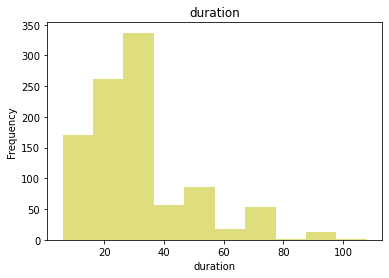

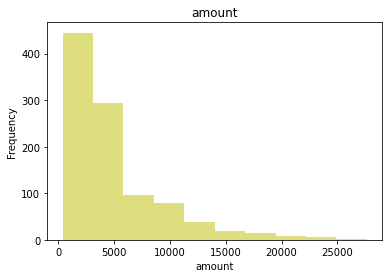

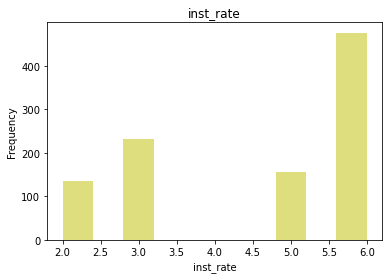

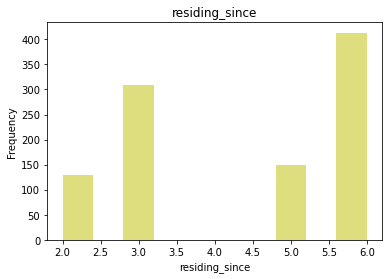

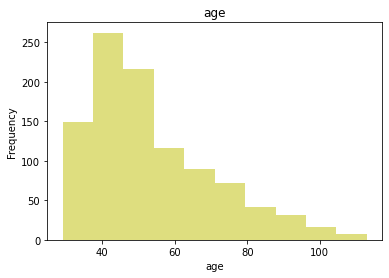

5 variables plotted


In [215]:
num_cols = [col for col in train.columns if train[col].dtypes != 'O']
print('Number of Numerical Variable: ', len(num_cols))


def hist_for_nums(data, numeric_cols):
    col_counter = 0
    data = data.copy()
    for col in numeric_cols:
        data[col].plot.hist(alpha=0.5, color='y')
        plt.xlabel(col)
        plt.title(col)
        plt.show()
        col_counter += 1
    print(col_counter, "variables plotted")


hist_for_nums(train, num_cols) #printing values of each numerical column

In [100]:
df_good = train.loc[train["status"] == 'good']['age'].values.tolist()
df_bad = train.loc[train["status"] == 'bad']['age'].values.tolist()
df_age = train['age'].values.tolist()

#First plot
t1 = go.Histogram(x=df_good,histnorm='probability',name="Good Credit")
#Second plot
t2 = go.Histogram(x=df_bad,histnorm='probability',name="Bad Credit")
#Third plot
t3 = go.Histogram(x=df_age,histnorm='probability',name="Overall Age")
#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Good','Bad', 'General Distribuition'))

#setting the figs
fig.append_trace(t1, 1, 1)
fig.append_trace(t2, 1, 2)
fig.append_trace(t3, 2, 1)

fig['layout'].update(showlegend=True, title='Age Distribuition', bargap=0.05)
py.iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

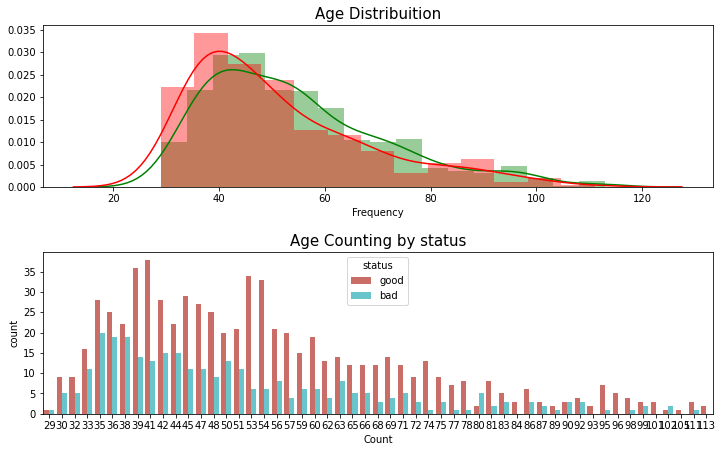

In [15]:
df_good = train[train["status"] == 'good']
df_bad = train[train["status"] == 'bad']

fig, ax = plt.subplots(nrows=2, figsize=(12,8))
plt.subplots_adjust(hspace = 0.4, top = 0.8)

g1 = sns.distplot(df_good["age"], ax=ax[0], 
             color="g")
g1 = sns.distplot(df_bad["age"], ax=ax[0], 
             color='r')
g1.set_title("Age Distribuition", fontsize=15)
g1.set_xlabel("age")
g1.set_xlabel("Frequency")

g2 = sns.countplot(x="age",data=train, 
              palette="hls", ax=ax[1], 
              hue = "status")
g2.set_title("Age Counting by status", fontsize=15)
g2.set_xlabel("Age")
g2.set_xlabel("Count")
plt.show()

In [ ]:
#people b/w age 35-51 have high bad credit

In [101]:
#Let's look the Credit Amount column
interval = (29, 40, 60, 120)

cats = ['Young', 'Adult', 'Senior']
train["Age_cat"] = pd.cut(train.age, interval, labels=cats)

# And let's re-create "df_bad" dataframes with "df_good" we created.
df_good = train[train["status"] == 'good']
df_bad = train[train["status"] == 'bad']

In [102]:
t0 = go.Box(y=df_good["amount"],x=df_good["Age_cat"],name='Good credit',marker=dict(color='LightSkyBlue'))

t1 = go.Box(y=df_bad['amount'],x=df_bad['Age_cat'],name='Bad credit',marker=dict(color='DarkSlateGrey'))
    
data = [t0, t1]
layout = go.Layout(yaxis=dict(title='Credit Amount',zeroline=False),xaxis=dict(title='Age Categorical'),boxmode='group')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

In [ ]:
#seniors tend to have bad credit with increase in credit amount

In [104]:
#First plot
t0 = go.Bar(
    x = train[train["status"]== 'good']["housing"].value_counts().index.values,
    y = train[train["status"]== 'good']["housing"].value_counts().values,name='Good credit')

#Second plot
t1 = go.Bar(
    x = train[train["status"]== 'bad']["housing"].value_counts().index.values,
    y = train[train["status"]== 'bad']["housing"].value_counts().values,name="Bad Credit")

data = [t0, t1]

layout = go.Layout(title='Housing Distribuition')

fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"

py.iplot(fig, filename='Housing-Grouped')

In [ ]:
#people with housing type A152 have high risk of bad credit

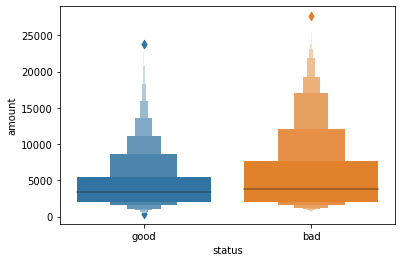

In [105]:
 sns.boxenplot(x="status", y="amount", hue=None,
                   data=train, palette=None)

In [ ]:
#Higher credit amount presents more risk than lower credit amounts

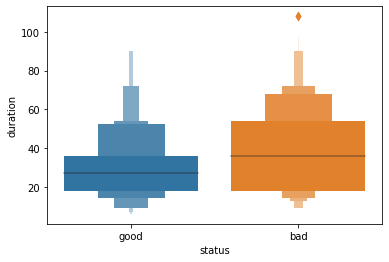

In [106]:
sns.boxenplot(x="status", y="duration", hue=None,
                   data=train, palette=None)

In [ ]:
#Higher duration is related to a higher risk

In [107]:
#First plot
t0 = go.Bar(
    x = train[train["status"]== 'good']["checkin_acc"].value_counts().index.values,
    y = train[train["status"]== 'bad']["checkin_acc"].value_counts().values,
    name='Good credit Distribuition' 
    
)

#Second plot
t1 = go.Bar(
    x = train[train["status"]== 'bad']["checkin_acc"].value_counts().index.values,
    y = train[train["status"]== 'bad']["checkin_acc"].value_counts().values,
    name="Bad Credit Distribuition"
)

data = [t0, t1]

layout = go.Layout(
    title='Checking accounts Distribuition',
    xaxis=dict(title='Checking accounts name'),
    yaxis=dict(title='Count'),
    barmode='group'
)
fig = go.Figure(data=data, layout=layout)
fig.data[0].marker.line.width = 4
fig.data[0].marker.line.color = "black"
fig.data[1].marker.line.width = 4
fig.data[1].marker.line.color = "black"
py.iplot(fig, filename = 'Age', validate = False)

In [ ]:
#People with A11 and A12 checking account higher risk

In [108]:
df_good = train[train["status"] == 'good']
df_bad = train[train["status"] == 'bad']

t0 = go.Box(y=df_good["amount"],x=df_good["checkin_acc"],name='Good credit')
t1 = go.Box(y=df_bad['amount'],x=df_bad['checkin_acc'],name='Bad credit')
    
data = [t0, t1]

layout = go.Layout(yaxis=dict(title='Cheking distribuition'),boxmode='group')
fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='box-age-cat')

Description of Distribuition Saving accounts by status:  
status      bad  good
svaing_acc           
A61         217   386
A62          34    69
A63          11    52
A64           6    42
A65          32   151


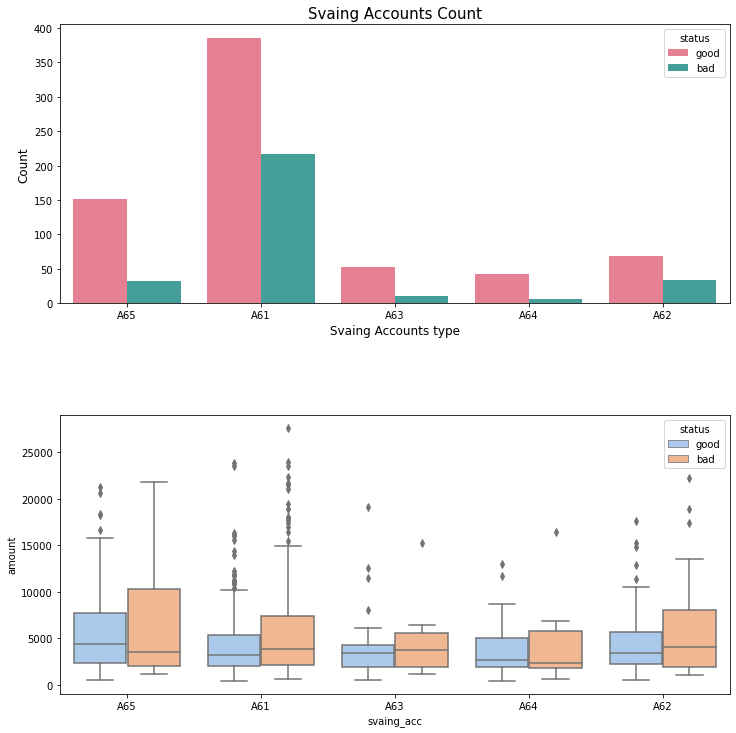

In [109]:
print("Description of Distribuition Saving accounts by status:  ")
print(pd.crosstab(train["svaing_acc"],train.status))

fig, ax = plt.subplots(2,1, figsize=(12,12))
g = sns.countplot(x="svaing_acc", data=train, palette="husl", 
              ax=ax[0],hue="status")
g.set_title("Svaing Accounts Count", fontsize=15)
g.set_xlabel("Svaing Accounts type", fontsize=12)
g.set_ylabel("Count", fontsize=12)


g = sns.boxplot(x="svaing_acc", y="amount", data=train, ax=ax[1],
            hue = "status",palette="pastel")
g2.set_title("Saving Accounts by Credit Amount", fontsize=15)
g2.set_xlabel("Savings Accounts type", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)

plt.subplots_adjust(hspace = 0.4,top = 0.9)

plt.show()

In [ ]:
#bad credit risk for every saving account increases with increase in credit amount

Values describe: 
status   bad  good
purpose           
A40       89   145
A41       17    86
A410       5     7
A42       58   123
A43       62   218
A44        4     8
A45        8    14
A46       22    28
A48        1     8
A49       34    63


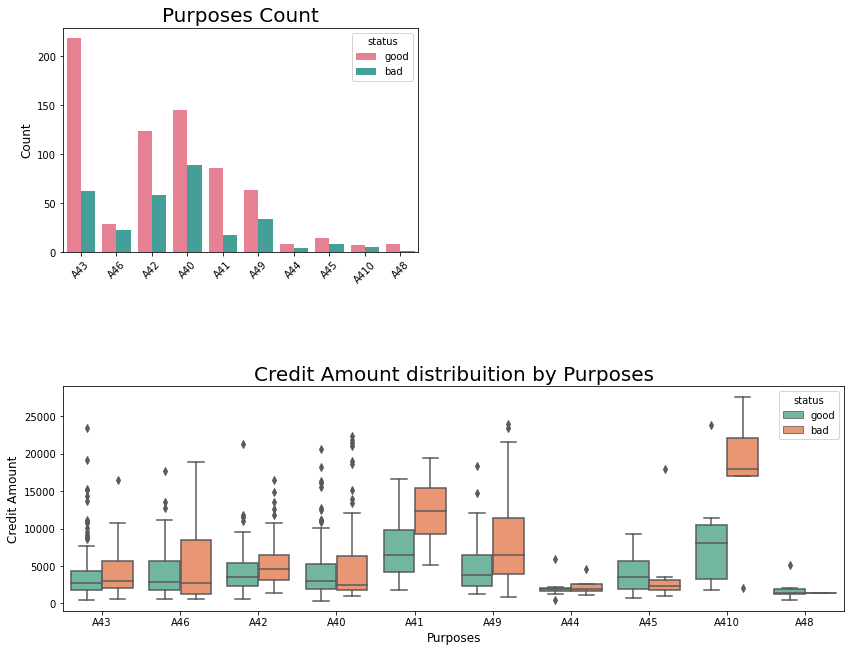

In [110]:
print("Values describe: ")
print(pd.crosstab(train.purpose, train.status))

plt.figure(figsize = (14,12))

plt.subplot(221)
g = sns.countplot(x="purpose", data=train, 
              palette="husl", hue = "status")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
g.set_title("Purposes Count", fontsize=20)



plt.subplot(212)
g2 = sns.boxplot(x="purpose", y="amount", data=train, 
               palette="Set2", hue = "status")
g2.set_xlabel("Purposes", fontsize=12)
g2.set_ylabel("Credit Amount", fontsize=12)
g2.set_title("Credit Amount distribuition by Purposes", fontsize=20)

plt.subplots_adjust(hspace = 0.6, top = 0.8)

plt.show()

Text(0, 0.5, 'Credit Amount')

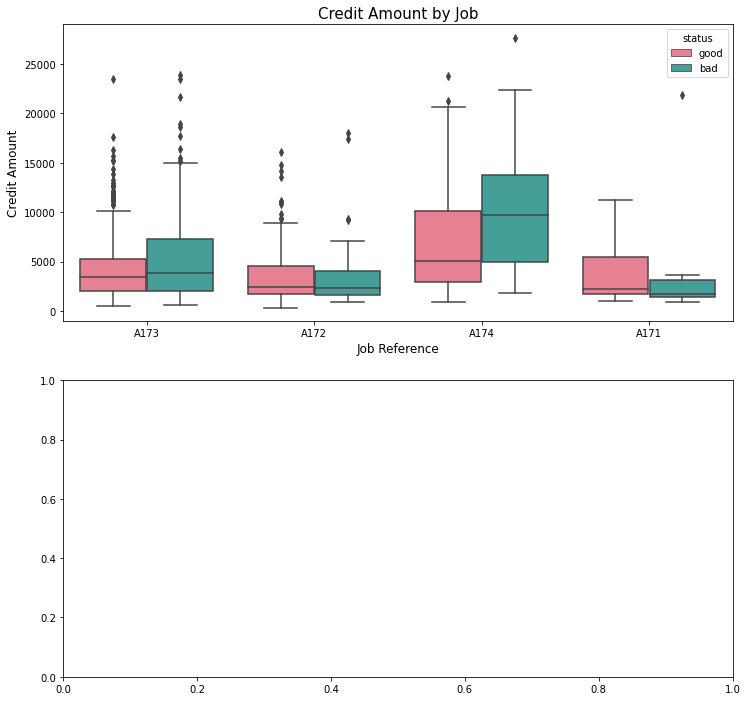

In [111]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="job", y="amount", data=train, 
            palette="husl", ax=ax[0], hue="status")
g1.set_title("Credit Amount by Job", fontsize=15)
g1.set_xlabel("Job Reference", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

In [ ]:
#A174 job, risk of high credit increases with increase in credit amount

In [112]:
#First plot
t0 = go.Bar(
    x = train[train["status"]== 'good']["personal_status"].value_counts().index.values,
    y = train[train["status"]== 'good']["personal_status"].value_counts().values,
    name='Good credit'
)

#First plot 2
t1 = go.Bar(
    x = train[train["status"]== 'bad']["personal_status"].value_counts().index.values,
    y = train[train["status"]== 'bad']["personal_status"].value_counts().values,
    name="Bad Credit"
)
#Second plot
t2 = go.Box(
    x = train[train["status"]== 'good']["personal_status"],
    y = train[train["status"]== 'good']["amount"],
    name=trace0.name
)

#Second plot 2
t3 = go.Box(
    x = train[train["status"]== 'bad']["personal_status"],
    y = train[train["status"]== 'bad']["amount"],
    name=trace1.name
)

data = [t0, t1, t2,t3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('personal_status Count', 'Credit Amount by personal_status'))

fig.append_trace(t0, 1, 1)
fig.append_trace(t1, 1, 1)
fig.append_trace(t2, 1, 2)
fig.append_trace(t3, 1, 2)
fig['layout'].update(height=400, width=800, title='personal_status Distribuition', boxmode='group')
py.iplot(fig, filename='personal_status-subplot')

In [113]:
#First plot
t0 = go.Bar(
    x = train[train["status"]== 'good']["foreign_worker"].value_counts().index.values,
    y = train[train["status"]== 'good']["foreign_worker"].value_counts().values,
    name='Good credit'
)

#First plot 2
t1 = go.Bar(
    x = train[train["status"]== 'bad']["foreign_worker"].value_counts().index.values,
    y = train[train["status"]== 'bad']["foreign_worker"].value_counts().values,
    name="Bad Credit"
)
#Second plot
t2 = go.Box(
    x = train[train["status"]== 'good']["foreign_worker"],
    y = train[train["status"]== 'good']["amount"],
    name=trace0.name
)

#Second plot 2
t3 = go.Box(
    x = train[train["status"]== 'bad']["foreign_worker"],
    y = train[train["status"]== 'bad']["amount"],
    name=trace1.name
)

data = [t0, t1, t2,t3]

fig = tls.make_subplots(rows=1, cols=2, 
                        subplot_titles=('foreign_worker Count', 'Credit Amount by foreign_worker'))

fig.append_trace(t0, 1, 1)
fig.append_trace(t1, 1, 1)
fig.append_trace(t2, 1, 2)
fig.append_trace(t3, 1, 2)
fig['layout'].update(height=400, width=800, title='foreign_worker Distribuition', boxmode='group')
py.iplot(fig, filename='foreign_worker-subplot')

In [ ]:
# foreign worker A201 have higher count of credit risk and A202 tends to show bad credit with increase in credit amount

Text(0, 0.5, 'Credit Amount')

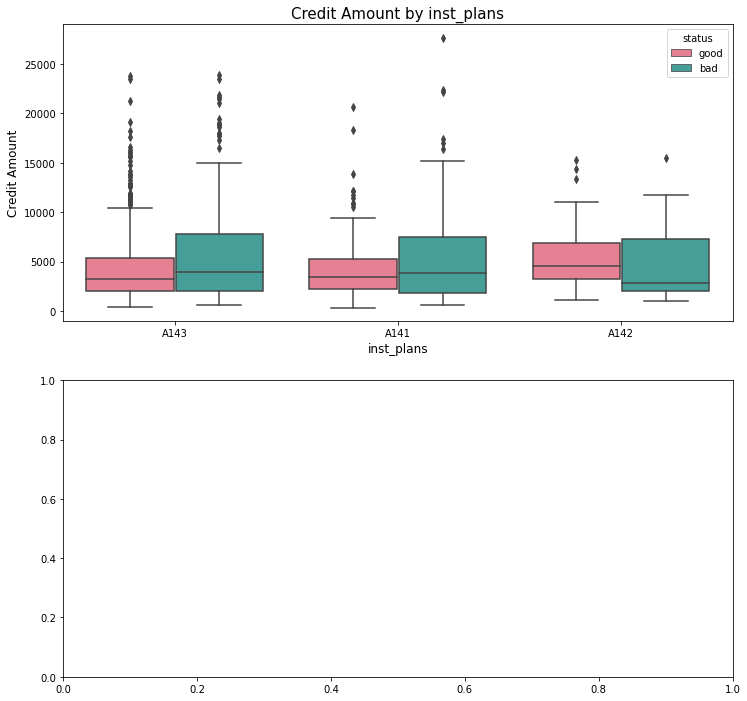

In [114]:
fig, ax = plt.subplots(figsize=(12,12), nrows=2)

g1 = sns.boxplot(x="inst_plans", y="amount", data=train, 
            palette="husl", ax=ax[0], hue="status")
g1.set_title("Credit Amount by inst_plans", fontsize=15)
g1.set_xlabel("inst_plans", fontsize=12)
g1.set_ylabel("Credit Amount", fontsize=12)

In [ ]:
#instalment plans tend to show bad credit for both high and low credit amounts 

In [216]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names

In [217]:
has_outliers(train, num_cols)

duration : 70
amount : 72
age : 23


['duration', 'amount', 'age']

In [218]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit


for col in num_cols:
    replace_with_thresholds(train, col)

has_outliers(train, num_cols)

[]

In [219]:
for col_name in train.columns:
    if(train[col_name].dtype == 'object'):
        train[col_name]= train[col_name].astype('category')
        train[col_name] = train[col_name].cat.codes

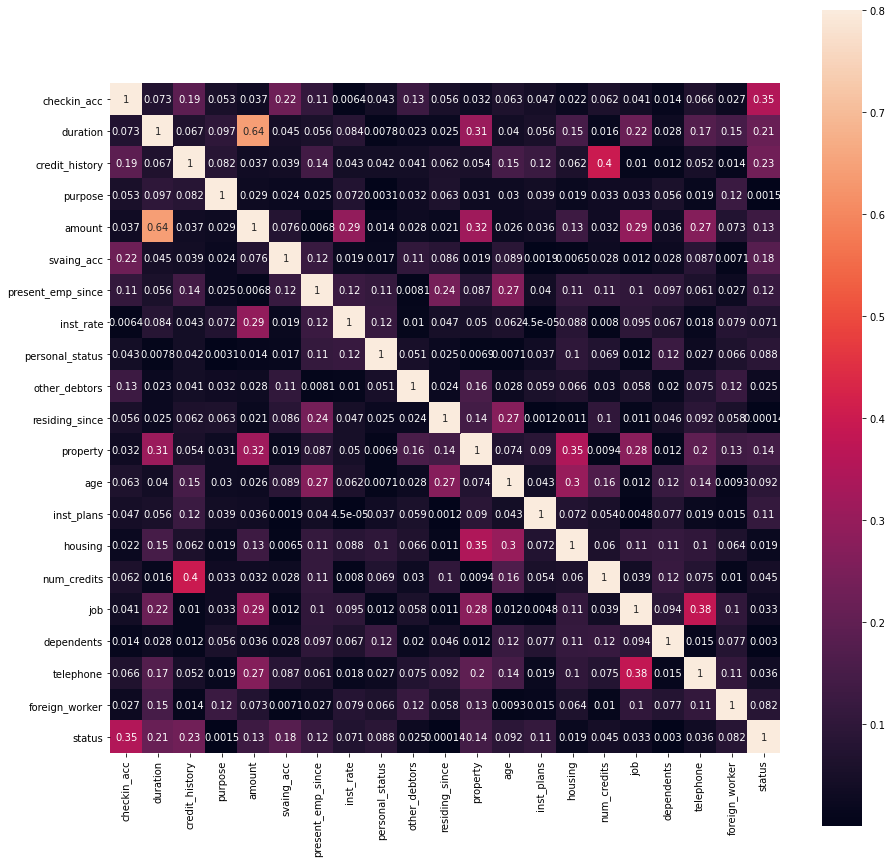

In [143]:
corrmat = abs(train.corr())
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, annot=True,square=True); #checking correlation

In [147]:
train.to_csv(r'C:\Users\Sunidhi Sharma\exported_df.csv')

In [184]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(random_state = 0)

In [220]:
X_clean = train.drop('status', axis=1)
y_clean = train['status']

In [131]:
model.fit(X_clean,y_clean)

ExtraTreesClassifier(random_state=0)

In [132]:
x = model.feature_importances_
x

array([0.12418368, 0.07973711, 0.0606978 , 0.05993649, 0.07603399,
       0.05318651, 0.0587674 , 0.04744497, 0.0443675 , 0.02836251,
       0.04798176, 0.05138002, 0.06543022, 0.03515666, 0.03561443,
       0.03093578, 0.04209442, 0.02066206, 0.03040088, 0.00762581])

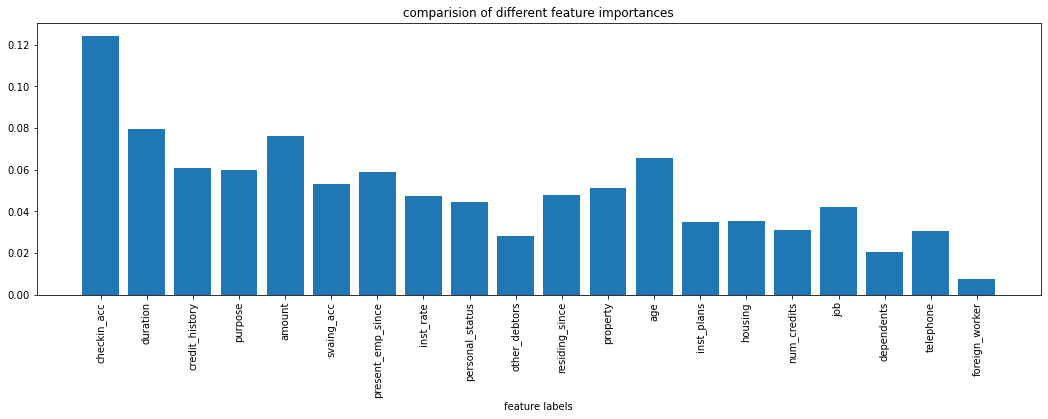

In [133]:
#plotting the bar graph as it is easy to visualize of the feature importances
f, ax = plt.subplots(figsize=(18,5))
plt.bar(X_clean.columns,x)
plt.xticks(rotation=90)
plt.xlabel('feature labels')
plt.title('comparision of different feature importances')
plt.show()

In [222]:
final=X_clean[['age', 'amount','duration']]

In [223]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
final1 = scaler.fit_transform(final)

In [226]:
df1=pd.DataFrame(final1)

In [227]:
df1.head()

,0,1,2
0,2.566481,-0.860883,-1.357532
1,-1.229465,1.326621,2.043856
2,1.240913,-0.436984,-0.790634
3,0.879394,2.209795,2.043856
4,1.602431,0.831970,0.343162


In [228]:
X_clean.head()

,checkin_acc,duration,credit_history,purpose,amount,svaing_acc,present_emp_since,inst_rate,personal_status,other_debtors,residing_since,property,age,inst_plans,housing,num_credits,job,dependents,telephone,foreign_worker
0,0,9.0,4,4,1754.0,4,4,6.0,2,0,6.0,0,96.0,2,1,1,2,0,1,0
1,1,63.0,2,4,8927.0,0,2,3.0,1,0,3.0,0,33.0,2,1,0,2,0,0,0
2,3,18.0,4,7,3144.0,0,3,3.0,2,0,5.0,0,74.0,2,1,0,1,1,0,0
3,0,63.0,2,3,11823.0,0,3,3.0,2,2,6.0,1,68.0,2,2,0,2,1,0,0
4,0,36.0,3,0,7305.0,0,2,5.0,2,0,6.0,3,80.0,2,2,1,2,1,0,0


In [229]:
X_clean.drop(['age'], axis=1, inplace=True)
X_clean.drop(['duration'], axis=1, inplace=True)
X_clean.drop(['amount'], axis=1, inplace=True)

In [230]:
data_clean = pd.concat([df1, X_clean], axis = 1)

In [242]:
data_clean.to_csv(r'C:\Users\Sunidhi Sharma\exported_data_final.csv')

In [232]:
from sklearn.metrics import classification_report,confusion_matrix, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.model_selection import ShuffleSplit,train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize, StandardScaler, MinMaxScaler

In [233]:
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(data_clean,y_clean,test_size=0.2, random_state=1)

In [234]:
sm = SMOTE()
X_train_clean_res, y_train_clean_res = sm.fit_resample(X_train_clean, y_train_clean)

In [235]:
print("Before/After clean")
unique, counts = np.unique(y_train_clean, return_counts=True)
print(dict(zip(unique, counts)))
unique, counts = np.unique(y_train_clean_res, return_counts=True)
print(dict(zip(unique, counts)))

Before/After clean
{0: 241, 1: 559}
{0: 559, 1: 559}


In [236]:
print(np.shape(X_train_clean_res))
print(np.shape(y_train_clean_res))
print(np.shape(X_test_clean)) 
print(np.shape(y_test_clean))

(1118, 20)
(1118,)
(200, 20)
(200,)


In [237]:
#used kfold cross validation to validate the model
import warnings
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import xgboost
from xgboost import XGBClassifier


warnings.filterwarnings("ignore")
models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('XGB', XGBClassifier()))

In [239]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train_clean_res, y_train_clean_res, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

GBC: 0.816844 (0.090502)
KNN: 0.802558 (0.098100)
CART: 0.744402 (0.084290)
NB: 0.745415 (0.133598)
RF: 0.832062 (0.083335)
[22:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:27:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set e

GBC: ROC AUC=0.749
GBC:Accuracy: 0.750000 
KNN: ROC AUC=0.665
KNN:Accuracy: 0.670000 
CART: ROC AUC=0.574
CART:Accuracy: 0.650000 
NB: ROC AUC=0.763
NB:Accuracy: 0.675000 
RF: ROC AUC=0.779
RF:Accuracy: 0.745000 
[22:27:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGB: ROC AUC=0.704
XGB:Accuracy: 0.705000 


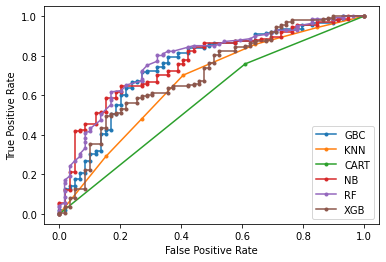

In [240]:
from sklearn.metrics import roc_auc_score , roc_curve

for name, model in models:
   
    model.fit(X_train_clean_res, y_train_clean_res)
    y_pred=model.predict(X_test_clean)
    y_proba=model.predict_proba(X_test_clean)
    y_proba=y_proba[:,1]
    auc=roc_auc_score(y_test_clean, y_proba)
    print('%s: ROC AUC=%.3f' % (name,auc))
    lr_fpr, lr_tpr, _ = roc_curve(y_test_clean, y_proba)
    plt.plot(lr_fpr, lr_tpr, marker='.', label=name)
    acc_score=accuracy_score(y_test_clean,y_pred)
    msg = "%s:Accuracy: %f " % (name, acc_score)
    print(msg)
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()    

In [241]:
#fitting the final model with RandomForest as it has highest accuracy among all
model_RF= RandomForestClassifier()
model_RF.fit(X_train_clean_res, y_train_clean_res)

RandomForestClassifier()